We go through how to use this library and do sanity check by visualization

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

from vanilla_nn import build_model
from vanilla_nn.losses import CrossEntropy
from vanilla_nn.optimizers import GDOptimizer

dataset = load_iris()
X = dataset.data
y = dataset.target

# To keep the class distribution, we use stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=.2)
train_idx, test_idx = next(split.split(X, y))
train_X = X[train_idx]
train_y = y[train_idx]
test_X = X[test_idx]
test_y = y[test_idx]


# Two hidden layers neural network
config = {'layer': [{'n_units': 16, 'activation': 'sigmoid', 'drop_rate': 0.1},
                    {'n_units': 8, 'activation': 'sigmoid', 'drop_rate': 0.1}],
          'input_dim': 4,
          'output_dim': 3}

model = build_model(config)

loss = CrossEntropy()
score_func = accuracy_score
n_epochs = 100000

optimizer = GDOptimizer(model,
                        CrossEntropy(),
                        lr=1e-2)

train_loss = []
test_loss = []
train_score = []
test_score = []
for i in range(n_epochs):
    optimizer.update(train_X, train_y)
    train_loss.append(optimizer.evaluate(train_X, train_y, training=False))
    test_loss.append(optimizer.evaluate(test_X, test_y, training=False))
    train_score.append(optimizer.evaluate(train_X, train_y,
                                          score_func=accuracy_score, training=False))
    test_score.append(optimizer.evaluate(train_X, train_y, 
                                         score_func=accuracy_score, training=False))

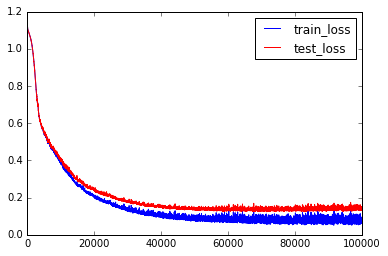

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_loss, color='b', label='train_loss')
plt.plot(test_loss, color='r', label='test_loss')
plt.legend()

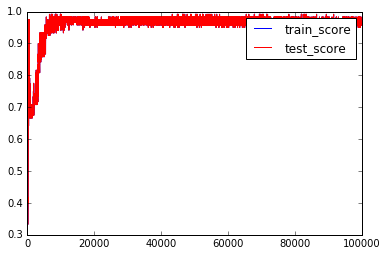

In [6]:
plt.plot(train_score, color='b', label='train_score')
plt.plot(test_score, color='r', label='test_score')
plt.legend()